# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [4]:
customers.corr()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641    0.205497  
Frozen                   -0.131525    0.390947  
Detergents_Paper          1.000000    0.069291  
Delicassen                0.069291    1.000000

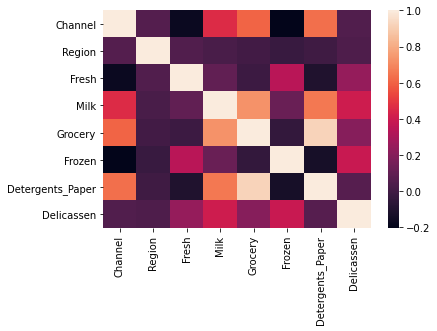

In [7]:
sns.heatmap(customers.corr())

In [6]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

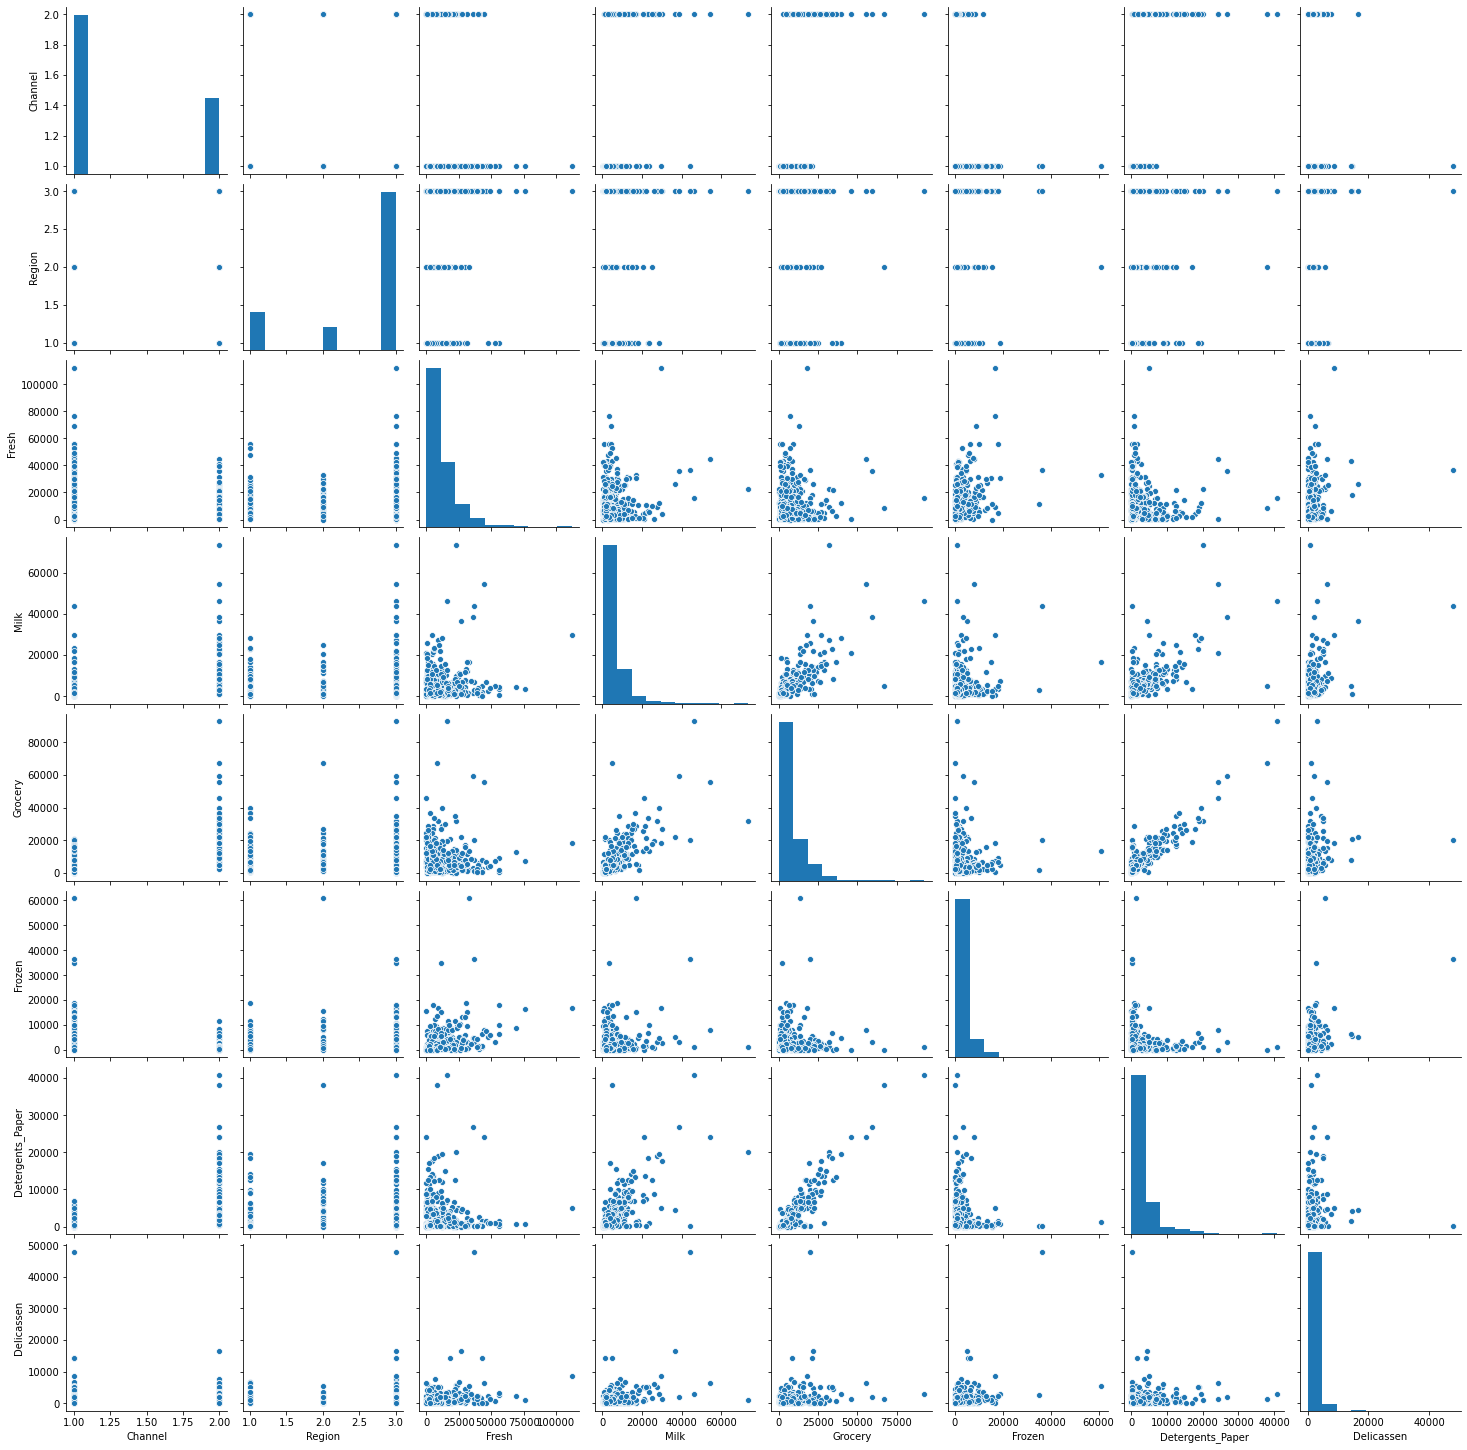

In [8]:
sns.pairplot(customers)

In [12]:
customers['TOTAL'] = customers[customers.columns[2:]].sum(axis = 1)
customers

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen     TOTAL  
0          1338   68229.0  
1          1776   66537.0  
2          7844   73225.0  
3          1788   54766.0  
4          5185   92205.0  
..          ...       ...  
435        2204  146608.0  
436        2346   96748.0  
437        1867  154819.0  
438        2125   35672.0  
439          52   15182.0  

[440 rows x 9 columns]

In [22]:

n = 440 # NUMBER OF CUSTOMERS
customers['Accumulative'] = customers['TOTAL'].cumsum()
customers


Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen     TOTAL  Accumulative  
0          1338   68229.0       68229.0  
1          1776   66537.0      134766.0  
2          7844   73225.0      207991.0  
3          1788   54766.0      262757.0  
4          5185   92205.0      354962.0  
..          ...       ...           ...  
435        2204  146608.0    28938280.0  
436        2346   96748.0    29035028.0  
437        1867  154819.0    29189847.0  
438        2125   35672.0    29225519.0  
439          52   15182.0    29240701.0  

[440 rows x 10 columns]

In [23]:

total = customers['TOTAL'].sum() 
total80 = customers['TOTAL'].sum() * 0.8
customers['AccByPerc'] = 100 * customers['Accumulative'] / total
customers


Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen     TOTAL  Accumulative   AccByPerc  
0          1338   68229.0       68229.0    0.233336  
1          1776   66537.0      134766.0    0.460885  
2          7844   73225.0      207991.0    0.711306  
3          1788   54766.0      262757.0    0.898600  
4          5185   92205.0      354962.0    1.213931  
..          ...       ...           ...         ...  
435        2204  146608.0    28938280.0   98.965753  
436        2346   96748.0    29035028.0   99.296621  
437        1867  154819.0    29189847.0   99.826085  
438        2125   35672.0    29225519.0   99.948079  
439          52   15182.0    29240701.0  100.000000  

[440 rows x 11 columns]

In [25]:

# THE PALETO RULE DOESNT APPLY

custs = len(customers.query('AccByPerc < 80'))
perc_custs = custs / n * 100
perc_custs


75.68181818181819

In [ ]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [26]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
ss = StandardScaler()
scaled = customers.copy()
scaled[customers.columns[2:]] =ss.fit_transform(scaled[customers.columns[2:]])
scaled


Channel  Region     Fresh      Milk   Grocery    Frozen  \
0          2       3  0.052933  0.523568 -0.041115 -0.589367   
1          2       3 -0.391302  0.544458  0.170318 -0.270136   
2          2       3 -0.447029  0.408538 -0.028157 -0.137536   
3          1       3  0.100111 -0.624020 -0.392977  0.687144   
4          2       3  0.840239 -0.052396 -0.079356  0.173859   
..       ...     ...       ...       ...       ...       ...   
435        1       3  1.401312  0.848446  0.850760  2.075222   
436        1       3  2.155293 -0.592142 -0.757165  0.296561   
437        2       3  0.200326  1.314671  2.348386 -0.543380   
438        1       3 -0.135384 -0.517536 -0.602514 -0.419441   
439        1       3 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen     TOTAL  Accumulative  AccByPerc  
0           -0.043569   -0.066339  0.033671     -1.879495  -1.879495  
1            0.086407    0.089151  0.001536     -1.871475  -1.871475  
2            0.133232    2.243293  0.128556     -1.862649  -1.862649  
3           -0.498588    0.093411 -0.222023     -1.856048  -1.856048  
4           -0.231918    1.299347  0.489031     -1.844935  -1.844935  
..                ...         ...       ...           ...        ...  
435         -0.566831    0.241091  1.522270      1.600225   1.600225  
436         -0.585519    0.291501  0.575313      1.611886   1.611886  
437          2.511218    0.121456  1.678216      1.630547   1.630547  
438         -0.569770    0.213046 -0.584662      1.634846   1.634846  
439         -0.504888   -0.522869 -0.973815      1.636676   1.636676  

[440 rows x 11 columns]

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [27]:
# Your code here:

from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 4).fit(scaled)
customers['labels'] = kmean.labels_
customers.head()


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen    TOTAL  Accumulative  AccByPerc  labels  
0        1338  68229.0       68229.0   0.233336       1  
1        1776  66537.0      134766.0   0.460885       1  
2        7844  73225.0      207991.0   0.711306       1  
3        1788  54766.0      262757.0   0.898600       1  
4        5185  92205.0      354962.0   1.213931       1

Count the values in `labels`.

In [28]:
# Your code here:

customers['labels'].value_counts()


2    204
1    156
0     67
3     13
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [29]:
# Your code here

from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = .5, min_samples = 8)
dbs.fit(scaled)


DBSCAN(min_samples=8)

Count the values in `labels_DBSCAN`.

In [30]:
# Your code here

customers['labels_DBSCAN'] = dbs.labels_
customers


Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen     TOTAL  Accumulative   AccByPerc  labels  labels_DBSCAN  
0          1338   68229.0       68229.0    0.233336       1             -1  
1          1776   66537.0      134766.0    0.460885       1             -1  
2          7844   73225.0      207991.0    0.711306       1             -1  
3          1788   54766.0      262757.0    0.898600       1             -1  
4          5185   92205.0      354962.0    1.213931       1             -1  
..          ...       ...           ...         ...     ...            ...  
435        2204  146608.0    28938280.0   98.965753       2             -1  
436        2346   96748.0    29035028.0   99.296621       2             -1  
437        1867  154819.0    29189847.0   99.826085       0             -1  
438        2125   35672.0    29225519.0   99.948079       2             -1  
439          52   15182.0    29240701.0  100.000000       2             -1  

[440 rows x 13 columns]

In [31]:

customers['labels_DBSCAN'].value_counts()


-1    395
 2     27
 1     10
 0      8
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [33]:
import plotly.express as px

In [34]:
# Your code here:

for c in ['labels', 'labels_DBSCAN']:

    p = px.scatter(customers, x = 'Detergents_Paper', y = 'Milk', color = c)
    p.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [35]:
# Your code here:

for c in ['labels', 'labels_DBSCAN']:

    p = px.scatter(customers, x = 'Grocery', y = 'Fresh', color = c)
    p.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [36]:
# Your code here:

for c in ['labels', 'labels_DBSCAN']:

    p = px.scatter(customers, x = 'Frozen', y = 'Delicassen', color = c)
    p.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [37]:
# Your code here:

customers.groupby('labels').mean()


Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.940299  2.417910   4461.611940  12013.671642  18947.537313   
1       1.269231  3.000000  13146.910256   3977.602564   5281.134615   
2       1.132353  2.235294  12581.598039   3338.029412   4278.205882   
3       1.769231  2.538462  27972.230769  34152.076923  40958.923077   

              Frozen  Detergents_Paper   Delicassen          TOTAL  \
labels                                                               
0        1422.268657       8334.328358  1587.791045   93538.776119   
1        2869.641026       1580.615385  1435.493590   56587.064103   
2        3242.460784       1083.691176  1146.622549   51344.583333   
3       11325.538462      18600.615385  8208.692308  282440.461538   

        Accumulative  AccByPerc  labels_DBSCAN  
labels                                          
0       1.539241e+07  52.640364      -1.000000  
1       7.462665e+06  25.521500      -0.948718  
2       2.229732e+07  76.254408      -0.504902  
3       1.131165e+07  38.684591      -1.000000

In [38]:

customers.groupby('labels_DBSCAN').mean()


Channel    Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                               
-1             1.359494  2.541772  12707.549367  6272.587342  8651.440506   
 0             1.000000  3.000000   6917.125000  1776.000000  1917.500000   
 1             1.000000  1.000000   6687.900000  1301.800000  1678.400000   
 2             1.000000  3.000000   5127.148148  1683.666667  1819.222222   

                    Frozen  Detergents_Paper   Delicassen         TOTAL  \
labels_DBSCAN                                                             
-1             3259.843038       3175.334177  1634.055696  71405.521519   
 0             1340.625000        258.625000   467.375000  25358.500000   
 1             1499.600000        250.000000   564.600000  23966.600000   
 2             1418.185185        334.481481   596.518519  21962.444444   

               Accumulative  AccByPerc    labels  
labels_DBSCAN                                     
-1             1.506041e+07  51.504968  1.318987  
 0             1.112614e+07  38.050193  1.000000  
 1             1.646909e+07  56.322482  2.000000  
 2             2.550405e+07  87.221052  2.000000

Which algorithm appears to perform better?

In [ ]:
# Your observations here

'''
K MEANS seems to perform better as shown in the graphs ... also by analizing the means, it seems that Kmeans has a better definition over the clusters.
'''


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here